## STATS 601 Project workspace

### Import Libraries
Note that pandas version has to be 1.4.x or higher and python version has to be 3.8.x or higher in order to read the pickle file.

In [1]:
!pip3 install numpy==1.22.1
!pip3 install pandas==1.4.1
!pip3 install matplotlib
!pip3 install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=c4ad60d865459249f9be607f052aac25505d1a2c663de883df1d7b502be74492
  Stored in directory: \\engin-labs.m.storage.umich.edu\tywwyt\windat.v2\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn


In [1]:
import os
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit

# !pip3 install bayesian-optimization
# import hyperparam
import critic

### Read data from pickle file and visualize
*log_pr* is the log prices of the ten assets in the past 6 months. *volu* is the trading volume of the ten assets in the past 6 months. 

In [2]:
# Load the data frames

log_pr = pd.read_pickle("./log_price.df")
volu = pd.read_pickle("./volume_usd.df")

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

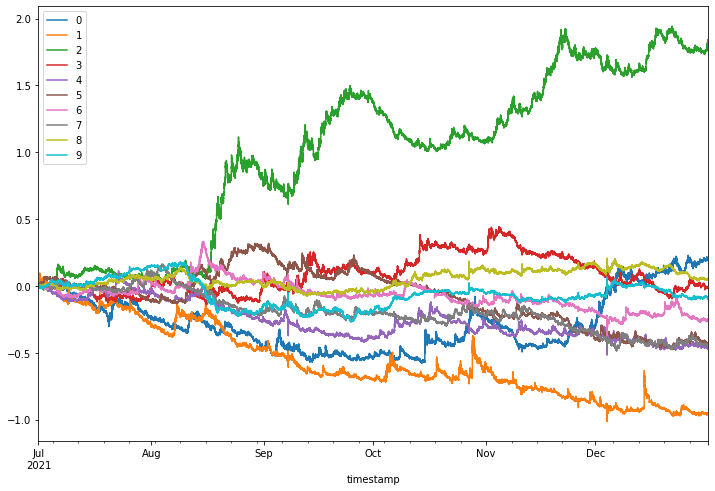

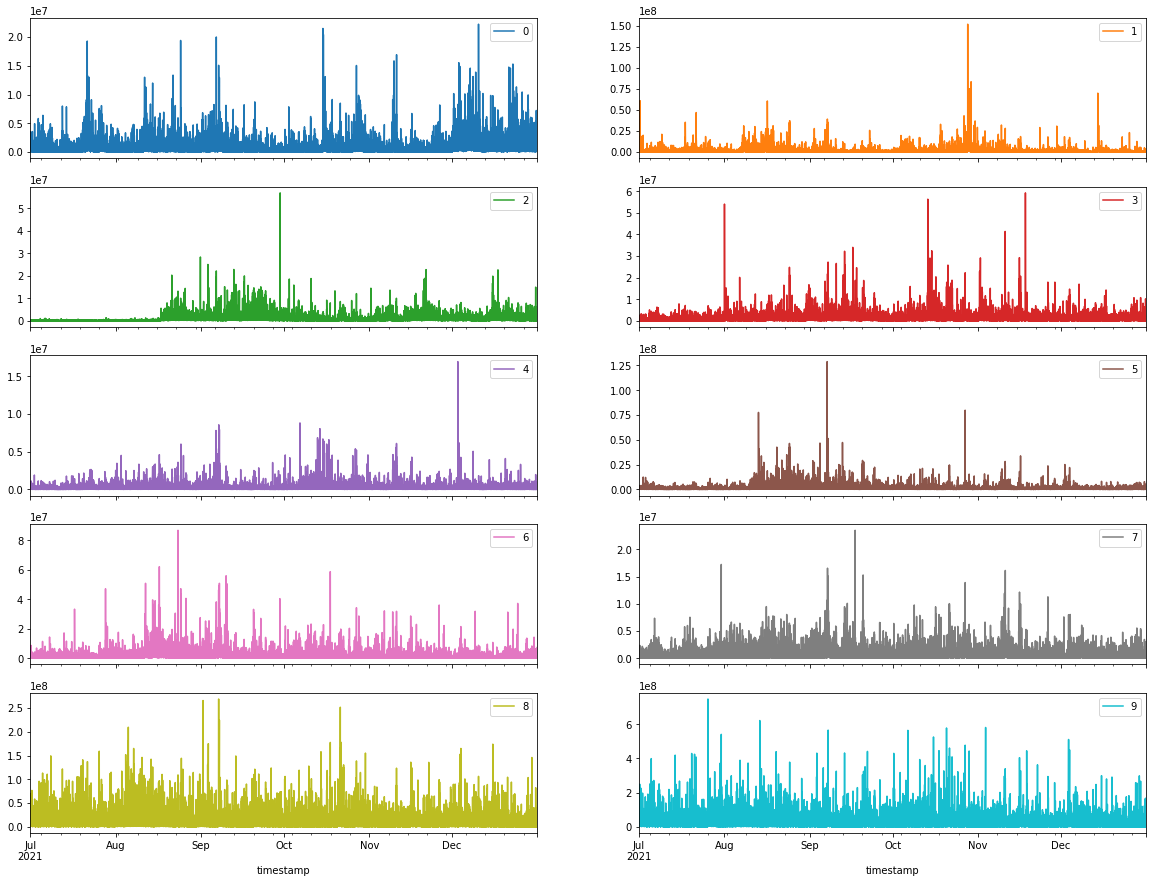

In [3]:
# Check the log-prices of the 10 assets

log_pr.plot(figsize=(12, 8))

# Check the volumes of the 10 assets

fig, axes = plt.subplots(5, 2, sharex=True, figsize=(20, 15))
volu.plot(subplots=True, ax=axes)

#TYWW starts here, 

In [4]:
log_pr_ind_np = np.zeros((10, log_pr.shape[0] // 1440 - 1, 1440))
volume_ind_np = np.zeros((10, log_pr.shape[0] // 1440 - 1, 1440))
for i in range(10):
    log_pr_ind_np[i] = np.delete(
        log_pr[i].to_numpy().reshape(log_pr.shape[0] // 1440, 1440), -1, 0)
    volume_ind_np[i] = np.delete(
        volu[i].to_numpy().reshape(volu.shape[0] // 1440, 1440), -1, 0)

log_pr_ind_np = np.moveaxis(log_pr_ind_np, 0, 1) # (num samples, features, 10)
volume_ind_np = np.moveaxis(volume_ind_np, 0, 1)

log_return_np = (log_pr.shift(-30) - log_pr).iloc[1440:-30:1440].to_numpy()  # (num samples, 10)

In [10]:
X_0 = np.zeros((1440,2,183))
X_0[:,0,:] = log_pr_ind_np[:,0,:].T
X_0[:,1,:] = volume_ind_np[:,0,:].T
train_x_0 = X_0[:,:,:-1]
train_y_0 = X_0[30,0,1:] - X_0[0,0,1:]

In [14]:
train_x_0.shape

(1440, 2, 182)

In [15]:
train_x_0 = train_x_0.reshape((1440* 2),182)

In [16]:
from sklearn import linear_model

In [18]:
reg = linear_model.LinearRegression()
reg.fit(train_x_0.T, train_y_0)

LinearRegression()

In [19]:
import pickle

In [23]:
from joblib import dump, load
dump(reg,'model1.joblib')

['model1.joblib']

0
1
2
3
4
5
6
7
8
9
